In [82]:
!pip install kagglehub

In [83]:
import kagglehub
import pandas as pd
import numpy as np
import os
import kagglehub
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from imblearn.over_sampling import SMOTE 
from xgboost import XGBClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
import seaborn as sns
import matplotlib.pyplot as plt

# Download dataset
path = kagglehub.dataset_download("dileep070/heart-disease-prediction-using-logistic-regression")
df = pd.read_csv(os.path.join(path, "framingham.csv"))

In [84]:
df.head()

,male,age,education,currentSmoker,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
0,1,39,4.0,0,0.0,0.0,0,0,0,195.0,106.0,70.0,26.97,80.0,77.0,0
1,0,46,2.0,0,0.0,0.0,0,0,0,250.0,121.0,81.0,28.73,95.0,76.0,0
2,1,48,1.0,1,20.0,0.0,0,0,0,245.0,127.5,80.0,25.34,75.0,70.0,0
3,0,61,3.0,1,30.0,0.0,0,1,0,225.0,150.0,95.0,28.58,65.0,103.0,1
4,0,46,3.0,1,23.0,0.0,0,0,0,285.0,130.0,84.0,23.10,85.0,85.0,0


In [85]:
df.rename(columns={'male':'gender'},inplace=True)
df.head()

,gender,age,education,currentSmoker,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
0,1,39,4.0,0,0.0,0.0,0,0,0,195.0,106.0,70.0,26.97,80.0,77.0,0
1,0,46,2.0,0,0.0,0.0,0,0,0,250.0,121.0,81.0,28.73,95.0,76.0,0
2,1,48,1.0,1,20.0,0.0,0,0,0,245.0,127.5,80.0,25.34,75.0,70.0,0
3,0,61,3.0,1,30.0,0.0,0,1,0,225.0,150.0,95.0,28.58,65.0,103.0,1
4,0,46,3.0,1,23.0,0.0,0,0,0,285.0,130.0,84.0,23.10,85.0,85.0,0


In [86]:
df.tail()

,gender,age,education,currentSmoker,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
4233,1,50,1.0,1,1.0,0.0,0,1,0,313.0,179.0,92.0,25.97,66.0,86.0,1
4234,1,51,3.0,1,43.0,0.0,0,0,0,207.0,126.5,80.0,19.71,65.0,68.0,0
4235,0,48,2.0,1,20.0,NaN,0,0,0,248.0,131.0,72.0,22.00,84.0,86.0,0
4236,0,44,1.0,1,15.0,0.0,0,0,0,210.0,126.5,87.0,19.16,86.0,NaN,0
4237,0,52,2.0,0,0.0,0.0,0,0,0,269.0,133.5,83.0,21.47,80.0,107.0,0


In [87]:
df.shape

(4238, 16)

In [88]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4238 entries, 0 to 4237
Data columns (total 16 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   gender           4238 non-null   int64  
 1   age              4238 non-null   int64  
 2   education        4133 non-null   float64
 3   currentSmoker    4238 non-null   int64  
 4   cigsPerDay       4209 non-null   float64
 5   BPMeds           4185 non-null   float64
 6   prevalentStroke  4238 non-null   int64  
 7   prevalentHyp     4238 non-null   int64  
 8   diabetes         4238 non-null   int64  
 9   totChol          4188 non-null   float64
 10  sysBP            4238 non-null   float64
 11  diaBP            4238 non-null   float64
 12  BMI              4219 non-null   float64
 13  heartRate        4237 non-null   float64
 14  glucose          3850 non-null   float64
 15  TenYearCHD       4238 non-null   int64  
dtypes: float64(9), int64(7)
memory usage: 529.9 KB


In [89]:
df.describe()

,gender,age,education,currentSmoker,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
count,4238.000000,4238.000000,4133.000000,4238.000000,4209.000000,4185.000000,4238.000000,4238.000000,4238.000000,4188.000000,4238.000000,4238.000000,4219.000000,4237.000000,3850.000000,4238.000000
mean,0.429212,49.584946,1.978950,0.494101,9.003089,0.029630,0.005899,0.310524,0.025720,236.721585,132.352407,82.893464,25.802008,75.878924,81.966753,0.151958
std,0.495022,8.572160,1.019791,0.500024,11.920094,0.169584,0.076587,0.462763,0.158316,44.590334,22.038097,11.910850,4.080111,12.026596,23.959998,0.359023
min,0.000000,32.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,107.000000,83.500000,48.000000,15.540000,44.000000,40.000000,0.000000
25%,0.000000,42.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,206.000000,117.000000,75.000000,23.070000,68.000000,71.000000,0.000000
50%,0.000000,49.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,234.000000,128.000000,82.000000,25.400000,75.000000,78.000000,0.000000
75%,1.000000,56.000000,3.000000,1.000000,20.000000,0.000000,0.000000,1.000000,0.000000,263.000000,144.000000,89.875000,28.040000,83.000000,87.000000,0.000000
max,1.000000,70.000000,4.000000,1.000000,70.000000,1.000000,1.000000,1.000000,1.000000,696.000000,295.000000,142.500000,56.800000,143.000000,394.000000,1.000000


In [90]:
df.isnull().sum()

gender               0
age                  0
education          105
currentSmoker        0
cigsPerDay          29
BPMeds              53
prevalentStroke      0
prevalentHyp         0
diabetes             0
totChol             50
sysBP                0
diaBP                0
BMI                 19
heartRate            1
glucose            388
TenYearCHD           0
dtype: int64

In [91]:
df.drop(columns='education', inplace=True, errors='ignore')
df['cigsPerDay'] = df['cigsPerDay'].fillna(df['cigsPerDay'].median())
df['BPMeds'] = df['BPMeds'].fillna(df['BPMeds'].median())
df['totChol'] = df['totChol'].fillna(df['totChol'].median())
df['BMI'] = df['BMI'].fillna(df['BMI'].median())
df['heartRate'] = df['heartRate'].fillna(df['heartRate'].median())
df['glucose'] = df['glucose'].fillna(df['glucose'].median())

In [92]:
df.isnull().any()

gender             False
age                False
currentSmoker      False
cigsPerDay         False
BPMeds             False
prevalentStroke    False
prevalentHyp       False
diabetes           False
totChol            False
sysBP              False
diaBP              False
BMI                False
heartRate          False
glucose            False
TenYearCHD         False
dtype: bool

In [93]:
df.duplicated().sum()

np.int64(0)

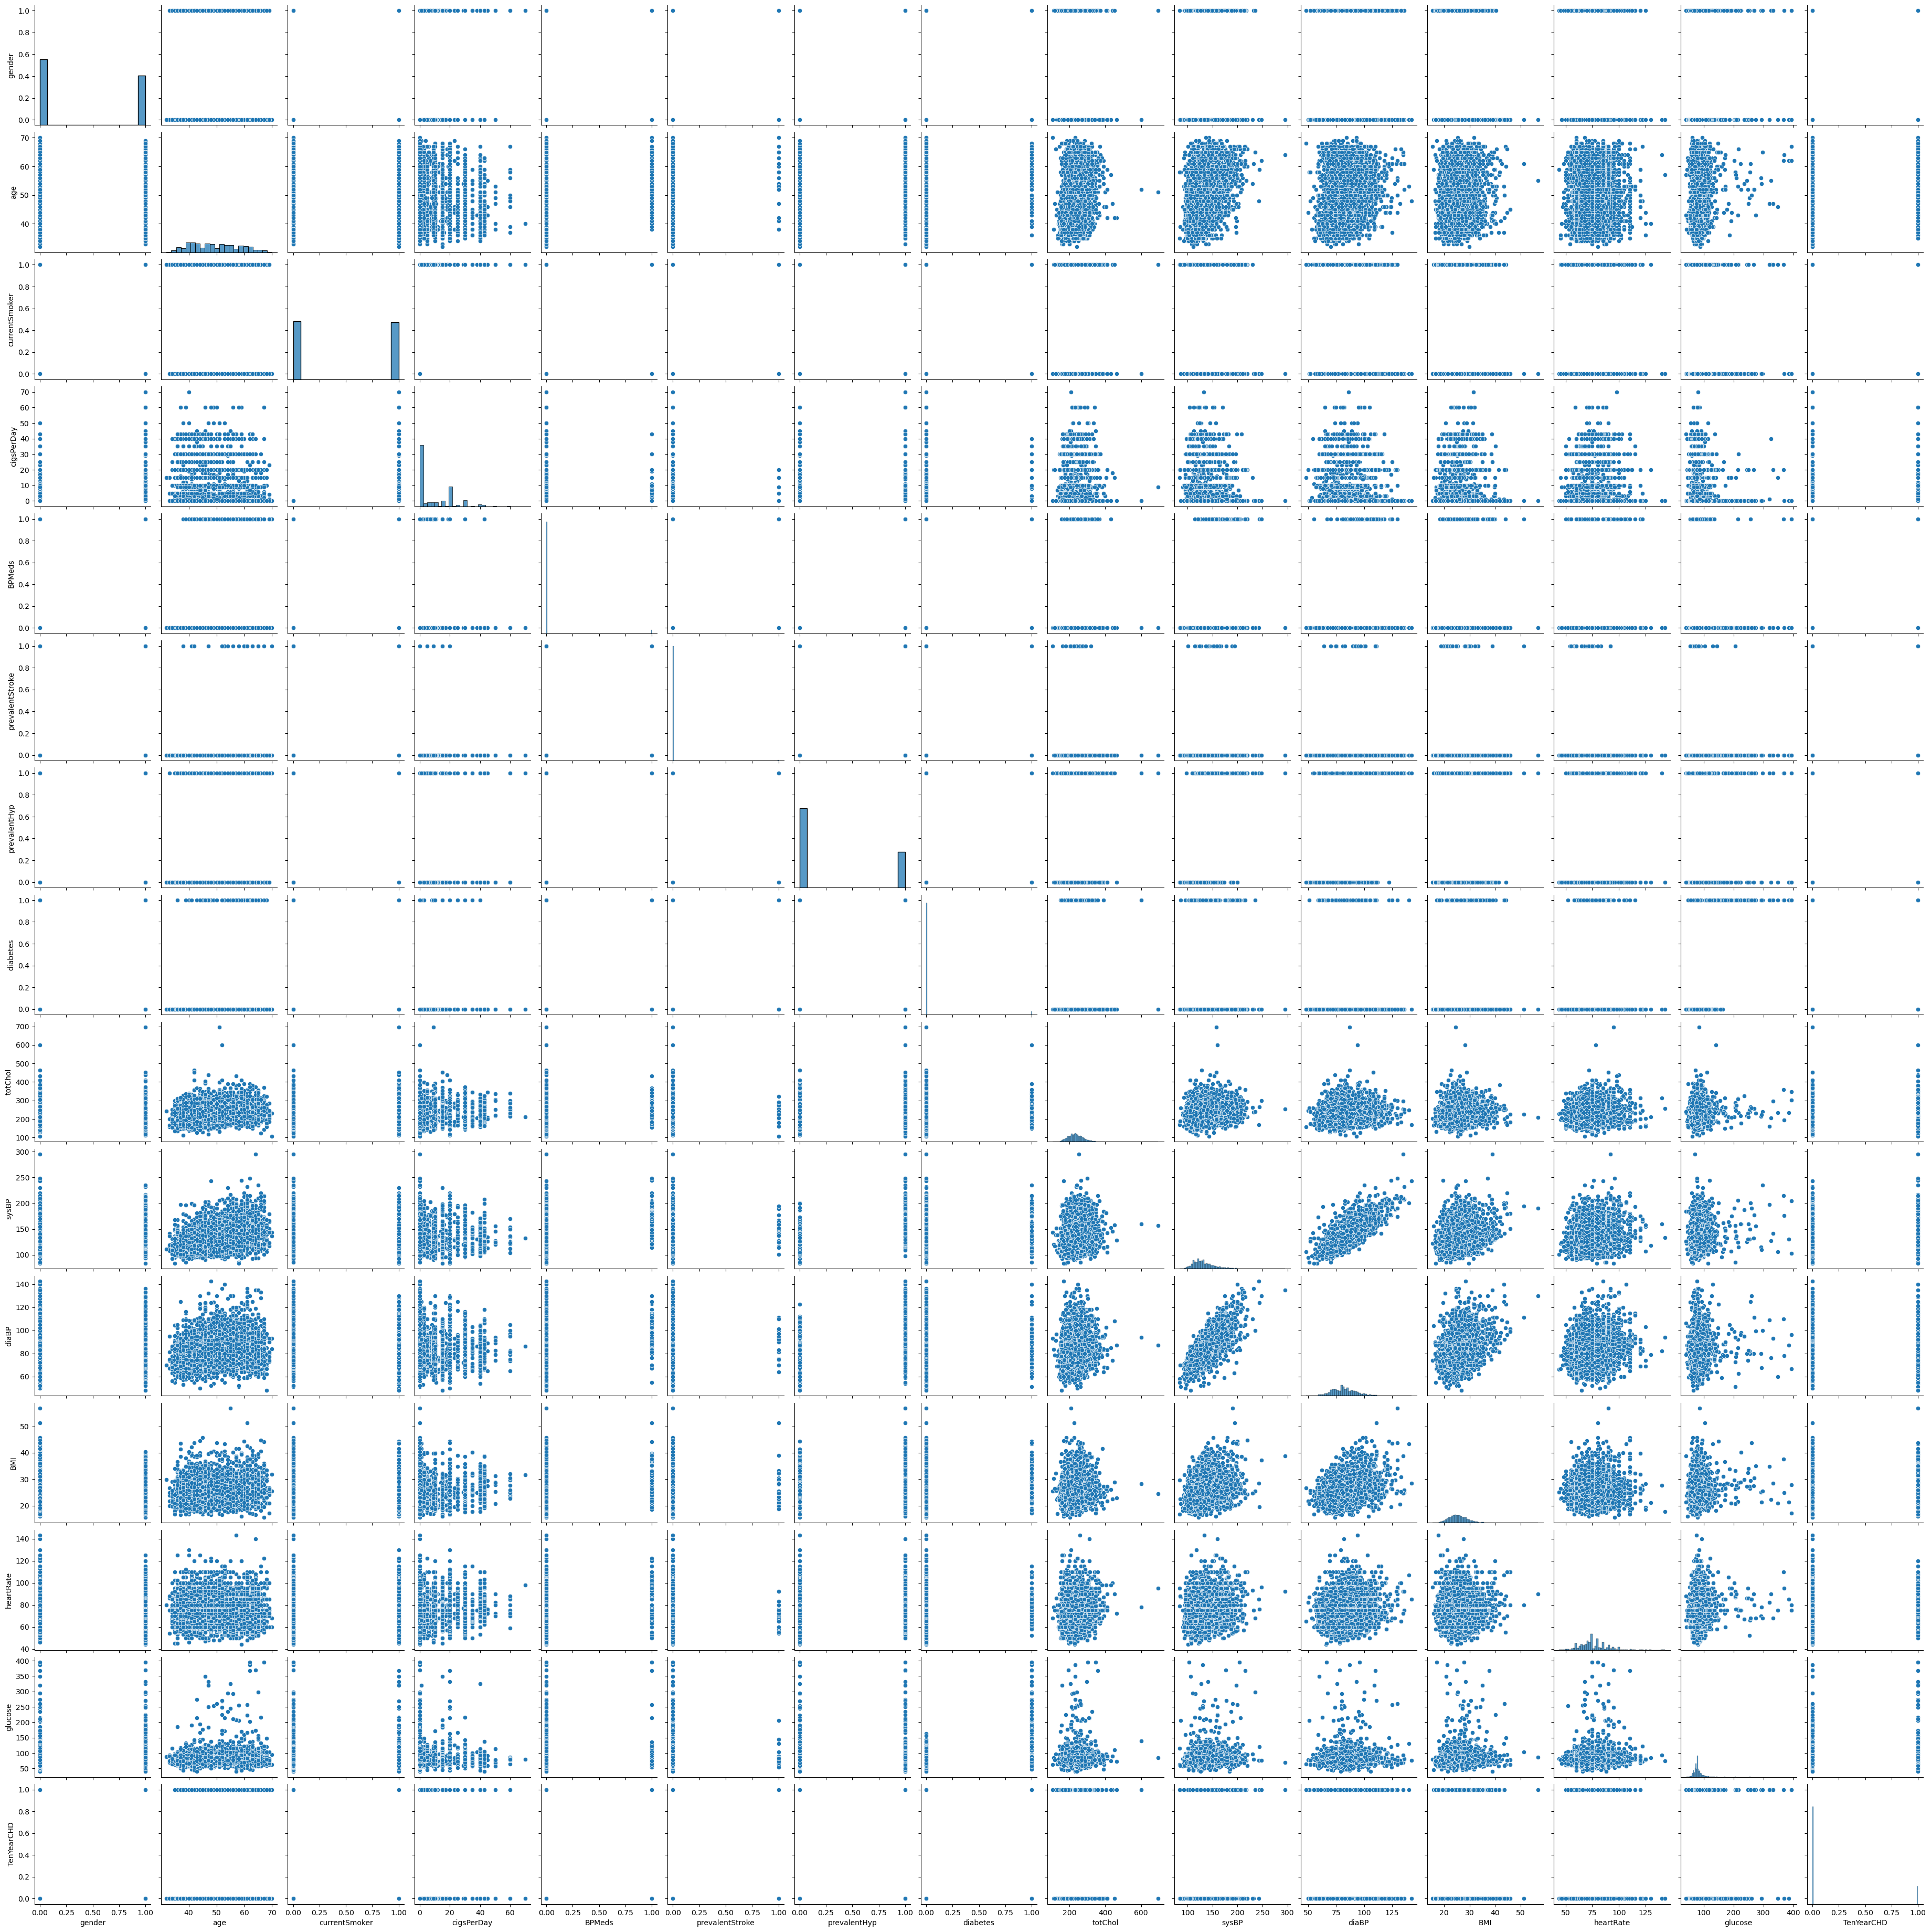

In [94]:
sns.pairplot(data=df)
plt.show()

C:\Users\Harsh Tiwari\AppData\Local\Temp\ipykernel_23052\1665690001.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='TenYearCHD', data=df, palette='Set2')


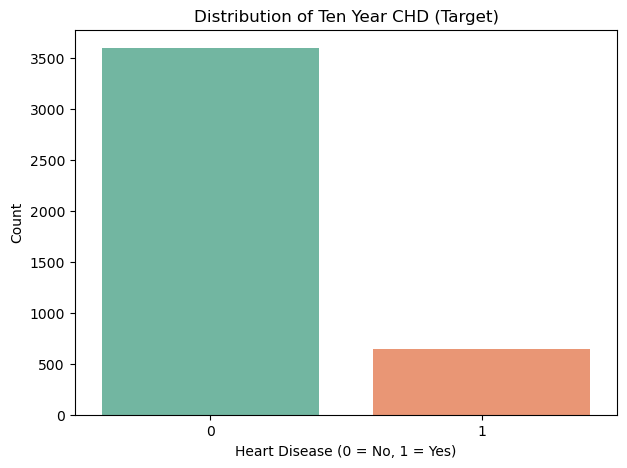

In [95]:
plt.figure(figsize=(7, 5))
sns.countplot(x='TenYearCHD', data=df, palette='Set2')
plt.title('Distribution of Ten Year CHD (Target)')
plt.xlabel('Heart Disease (0 = No, 1 = Yes)')
plt.ylabel('Count')
plt.show()

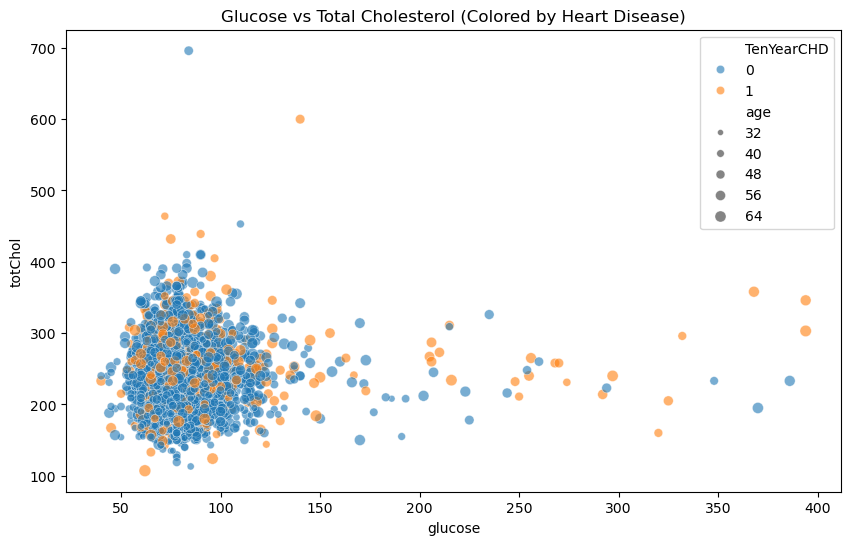

In [96]:
plt.figure(figsize=(10, 6))
sns.scatterplot(x='glucose', y='totChol', hue='TenYearCHD', size='age', data=df, alpha=0.6)
plt.title('Glucose vs Total Cholesterol (Colored by Heart Disease)')
plt.show()

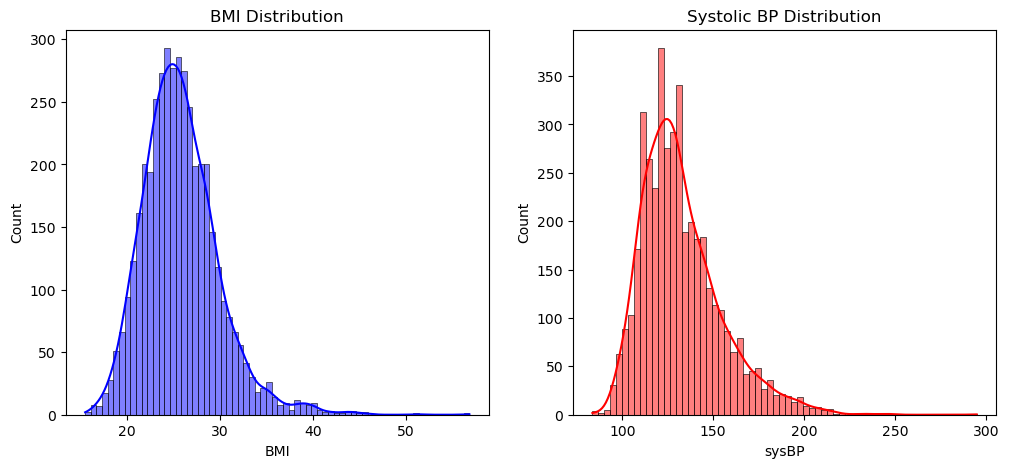

In [97]:
plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
sns.histplot(df['BMI'], kde=True, color='blue')
plt.title('BMI Distribution')

plt.subplot(1, 2, 2)
sns.histplot(df['sysBP'], kde=True, color='red')
plt.title('Systolic BP Distribution')

plt.show()

In [98]:
df.corr()

,gender,age,currentSmoker,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
gender,1.000000,-0.028979,0.197596,0.315630,-0.051545,-0.004546,0.005313,0.015708,-0.069549,-0.035989,0.057933,0.081653,-0.116621,0.010073,0.088428
age,-0.028979,1.000000,-0.213748,-0.191847,0.120955,0.057655,0.307194,0.101258,0.260105,0.394302,0.206104,0.135174,-0.012848,0.117788,0.225256
currentSmoker,0.197596,-0.213748,1.000000,0.760239,-0.048358,-0.032988,-0.103260,-0.044295,-0.046466,-0.130230,-0.107746,-0.167161,0.062330,-0.055177,0.019456
cigsPerDay,0.315630,-0.191847,0.760239,1.000000,-0.044675,-0.032244,-0.065046,-0.036150,-0.026976,-0.088375,-0.056687,-0.092211,0.073853,-0.056863,0.058859
BPMeds,-0.051545,0.120955,-0.048358,-0.044675,1.000000,0.114609,0.258697,0.051394,0.078578,0.251503,0.192356,0.099584,0.015142,0.049124,0.086417
prevalentStroke,-0.004546,0.057655,-0.032988,-0.032244,0.114609,1.000000,0.074830,0.006949,0.000123,0.057009,0.045190,0.024265,-0.017674,0.018722,0.061810
prevalentHyp,0.005313,0.307194,-0.103260,-0.065046,0.258697,0.074830,1.000000,0.077808,0.163054,0.696755,0.615751,0.300510,0.147196,0.083571,0.177603
diabetes,0.015708,0.101258,-0.044295,-0.036150,0.051394,0.006949,0.077808,1.000000,0.040117,0.111283,0.050329,0.086025,0.048996,0.606493,0.097317
totChol,-0.069549,0.260105,-0.046466,-0.026976,0.078578,0.000123,0.163054,0.040117,1.000000,0.207522,0.163888,0.114811,0.090537,0.045559,0.081566
sysBP,-0.035989,0.394302,-0.130230,-0.088375,0.251503,0.057009,0.696755,0.111283,0.207522,1.000000,0.784002,0.325161,0.182143,0.135136,0.216429


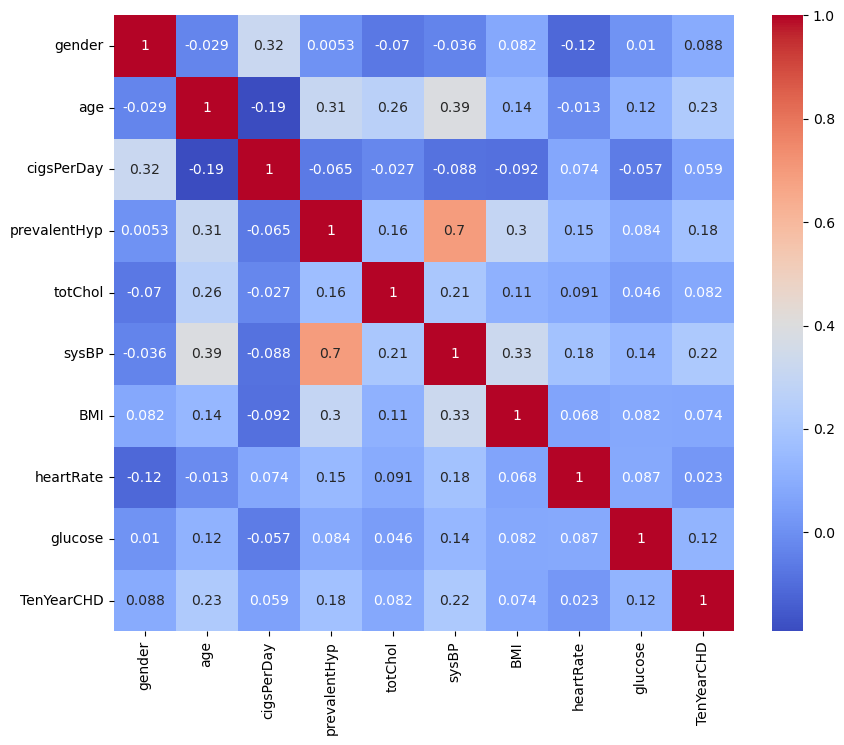

In [102]:
plt.figure(figsize = (10, 8))
sns.heatmap(df.corr(), annot = True , cmap= 'coolwarm')
plt.show()

In [168]:
def handle_outliers(df, col):
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1
    lower = Q1 - 1.5 * IQR
    upper = Q3 + 1.5 * IQR
    df[col] = np.where(df[col] > upper, upper, np.where(df[col] < lower, lower, df[col]))
    return df

cols_to_fix = ['totChol', 'sysBP', 'glucose', 'BMI', 'heartRate']
for col in cols_to_fix:
    df = handle_outliers(df, col)

In [169]:
df.drop(['currentSmoker', 'diaBP', 'diabetes', 'BPMeds','prevalentStroke'], axis=1, inplace=True, errors='ignore')
df.head()

,gender,age,cigsPerDay,prevalentHyp,totChol,sysBP,BMI,heartRate,glucose,TenYearCHD
0,1,39,0.0,0,195.0,106.0,26.97,80.0,77.0,0
1,0,46,0.0,0,250.0,121.0,28.73,95.0,76.0,0
2,1,48,20.0,0,245.0,127.5,25.34,75.0,70.0,0
3,0,61,30.0,1,225.0,150.0,28.58,65.0,103.0,1
4,0,46,23.0,0,285.0,130.0,23.10,85.0,85.0,0


In [170]:
x= df.iloc[:,:-1]
x

,gender,age,cigsPerDay,prevalentHyp,totChol,sysBP,BMI,heartRate,glucose
0,1,39,0.0,0,195.0,106.0,26.97,80.0,77.0
1,0,46,0.0,0,250.0,121.0,28.73,95.0,76.0
2,1,48,20.0,0,245.0,127.5,25.34,75.0,70.0
3,0,61,30.0,1,225.0,150.0,28.58,65.0,103.0
4,0,46,23.0,0,285.0,130.0,23.10,85.0,85.0
...,...,...,...,...,...,...,...,...,...
4233,1,50,1.0,1,313.0,179.0,25.97,66.0,86.0
4234,1,51,43.0,0,207.0,126.5,19.71,65.0,68.0
4235,0,48,20.0,0,248.0,131.0,22.00,84.0,86.0
4236,0,44,15.0,0,210.0,126.5,19.16,86.0,78.0


In [171]:
y =df.iloc[:,-1:]
y

,TenYearCHD
0,0
1,0
2,0
3,1
4,0
...,...
4233,1
4234,0
4235,0
4236,0


In [172]:
from sklearn.model_selection import train_test_split

In [173]:
x_train ,x_test , y_train, y_test= train_test_split(x , y , test_size = 0.2 , random_state = 42)

In [174]:
x_train

,gender,age,cigsPerDay,prevalentHyp,totChol,sysBP,BMI,heartRate,glucose
3252,1,40,30.0,0,205.0,131.0,23.74,66.0,87.0
3946,0,57,0.0,1,250.0,152.5,32.31,75.0,94.0
1261,0,47,0.0,0,230.0,123.0,26.98,83.0,73.0
2536,1,41,30.0,0,228.0,113.0,25.67,67.0,70.0
4089,0,64,0.0,1,232.0,149.5,20.49,68.0,96.0
...,...,...,...,...,...,...,...,...,...
3444,0,36,5.0,1,222.0,147.0,26.79,76.0,71.0
466,0,57,15.0,0,250.0,125.0,21.08,80.0,72.0
3092,0,60,0.0,1,298.0,133.0,25.09,83.0,81.0
3772,1,39,10.0,0,215.0,102.0,24.50,68.0,62.0


In [175]:
x_test

,gender,age,cigsPerDay,prevalentHyp,totChol,sysBP,BMI,heartRate,glucose
3188,1,63,0.0,1,190.0,148.0,27.13,72.0,86.0
764,1,45,0.0,0,162.0,125.0,27.98,85.0,83.0
3264,0,51,2.0,0,261.0,127.0,20.24,75.0,96.0
1967,1,45,30.0,0,250.0,126.0,28.68,75.0,92.0
2185,0,45,3.0,0,250.0,130.0,20.24,90.0,86.0
...,...,...,...,...,...,...,...,...,...
3303,1,47,0.0,0,259.0,139.0,29.34,70.0,71.0
4056,1,44,0.0,0,254.0,130.0,28.15,80.0,74.0
4210,1,50,0.0,0,282.0,126.5,27.30,85.0,87.0
3971,1,64,0.0,1,195.0,176.0,24.90,95.0,104.5


In [176]:
y_test

,TenYearCHD
3188,0
764,0
3264,0
1967,0
2185,0
...,...
3303,1
4056,0
4210,0
3971,0


In [177]:
y_train

,TenYearCHD
3252,0
3946,0
1261,0
2536,0
4089,0
...,...
3444,0
466,0
3092,0
3772,0


In [178]:
scaler = StandardScaler()
x_train= scaler.fit_transform(x_train)
x_test = scaler.transform(x_test)

In [179]:
x_train = pd.DataFrame(x_train, columns=x.columns)
x_train

,gender,age,cigsPerDay,prevalentHyp,totChol,sysBP,BMI,heartRate,glucose
0,1.168617,-1.110334,1.764381,-0.675415,-0.740003,-0.046091,-0.527094,-0.854842,0.656885
1,-0.855712,0.871963,-0.755491,1.480571,0.322867,0.990114,1.723894,-0.075553,1.271138
2,-0.855712,-0.294094,-0.755491,-0.675415,-0.149519,-0.431656,0.323921,0.617147,-0.571620
3,1.168617,-0.993728,1.764381,-0.675415,-0.196758,-0.913612,-0.020162,-0.768254,-0.834871
4,-0.855712,1.688203,-0.755491,1.480571,-0.102281,0.845527,-1.380735,-0.681667,1.446639
...,...,...,...,...,...,...,...,...,...
3385,-0.855712,-1.576756,-0.335512,1.480571,-0.338474,0.725038,0.274016,0.011034,-0.747121
3386,-0.855712,0.871963,0.504445,-0.675415,0.322867,-0.335265,-1.225766,0.357385,-0.659370
3387,-0.855712,1.221780,-0.755491,1.480571,1.456595,0.050300,-0.172504,0.617147,0.130383
3388,1.168617,-1.226939,0.084467,-0.675415,-0.503809,-1.443764,-0.327473,-0.681667,-1.536874


In [180]:
x_test = pd.DataFrame(x_test, columns=x.columns)
x_test

,gender,age,cigsPerDay,prevalentHyp,totChol,sysBP,BMI,heartRate,glucose
0,1.168617,1.571597,-0.755491,1.480571,-1.094293,0.773234,0.363320,-0.335316,0.569135
1,1.168617,-0.527305,-0.755491,-0.675415,-1.755634,-0.335265,0.586580,0.790323,0.305884
2,-0.855712,0.172329,-0.587499,-0.675415,0.582680,-0.238874,-1.446400,-0.075553,1.446639
3,1.168617,-0.527305,1.764381,-0.675415,0.322867,-0.287070,0.770442,-0.075553,1.095637
4,-0.855712,-0.527305,-0.503504,-0.675415,0.322867,-0.094287,-1.446400,1.223261,0.569135
...,...,...,...,...,...,...,...,...,...
843,1.168617,-0.294094,-0.755491,-0.675415,0.535441,0.339473,0.943797,-0.508491,-0.747121
844,1.168617,-0.643911,-0.755491,-0.675415,0.417345,-0.094287,0.631232,0.357385,-0.483870
845,1.168617,0.055723,-0.755491,-0.675415,1.078686,-0.262972,0.407972,0.790323,0.656885
846,1.168617,1.688203,-0.755491,1.480571,-0.976196,2.122711,-0.222409,1.656199,2.192517


In [181]:
!pip install xgboost

In [219]:
from sklearn.model_selection import GridSearchCV
from xgboost import XGBClassifier

xgb = XGBClassifier(use_label_encoder=False, eval_metric='logloss', random_state=42)

param_grid = {
    'n_estimators': [100, 200],
    'max_depth': [4, 6, 8],
    'learning_rate': [0.01, 0.1, 0.2],
    'subsample': [0.8, 1.0]
}

grid_search = GridSearchCV(estimator=xgb, param_grid=param_grid, cv=3, scoring='recall', verbose=1)

grid_search.fit(X_train_res, y_train_res)

best_xgb = grid_search.best_estimator_

print(f"Best Parameters: {grid_search.best_params_}")

y_pred_best = best_xgb.predict(x_test)
print("\n--- Optimized XGBoost Report ---")
print(classification_report(y_test, y_pred_best))

Fitting 3 folds for each of 36 candidates, totalling 108 fits


C:\Users\Harsh Tiwari\anaconda3\Lib\site-packages\xgboost\training.py:199: UserWarning: [20:14:07] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:790: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
C:\Users\Harsh Tiwari\anaconda3\Lib\site-packages\xgboost\training.py:199: UserWarning: [20:14:07] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:790: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
C:\Users\Harsh Tiwari\anaconda3\Lib\site-packages\xgboost\training.py:199: UserWarning: [20:14:07] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:790: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
C:\Users\Harsh Tiwari\anaconda3\Lib\site-packages\xgboost\training.py:199: UserWarning: [20:14:07] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:790: 
Parameters: { "use_label_encoder" } are

Best Parameters: {'learning_rate': 0.01, 'max_depth': 8, 'n_estimators': 200, 'subsample': 0.8}

--- Optimized XGBoost Report ---
              precision    recall  f1-score   support

           0       0.89      0.75      0.81       724
           1       0.24      0.47      0.32       124

    accuracy                           0.71       848
   macro avg       0.57      0.61      0.57       848
weighted avg       0.80      0.71      0.74       848



In [218]:
from sklearn.metrics import accuracy_score, recall_score

y_probs = best_xgb.predict_proba(x_test)[:, 1]

custom_threshold = 0.35
y_pred_custom = (y_probs >= custom_threshold).astype(int)

print(f"Custom Threshold (0.35) Accuracy: {accuracy_score(y_test, y_pred_custom):.2f}")
print(f"Custom Threshold (0.35) Recall: {recall_score(y_test, y_pred_custom):.2f}")

Custom Threshold (0.35) Accuracy: 0.53
Custom Threshold (0.35) Recall: 0.74


In [190]:
smote = SMOTE(random_state=42)
X_train_res, y_train_res = smote.fit_resample(x_train, y_train)

final_model = XGBClassifier(
    learning_rate=0.01,
    max_depth=8,
    n_estimators=200,
    subsample=0.8,
    colsample_bytree=0.8,
    eval_metric='logloss',
    random_state=42
)

final_model.fit(X_train_res, y_train_res)

,objective,'binary:logistic'
,base_score,None
,booster,None
,callbacks,None
,colsample_bylevel,None
,colsample_bynode,None
,colsample_bytree,0.8
,device,None
,early_stopping_rounds,None
,enable_categorical,False
,eval_metric,'logloss'


In [195]:
_probs = final_model.predict_proba(x_test)[:, 1]

custom_threshold = 0.35
y_pred_final = (y_probs >= custom_threshold).astype(int)
acc = accuracy_score(y_test, y_pred_final)

print(f"--- Final Model Accuracy: {acc:.2f} ({acc*100:.1f}%)")
print("--- FINAL MODEL PERFORMANCE REPORT ---")
print(classification_report(y_test, y_pred_final))

--- Final Model Accuracy: 0.53 (52.6%)
--- FINAL MODEL PERFORMANCE REPORT ---
              precision    recall  f1-score   support

           0       0.92      0.49      0.64       724
           1       0.20      0.74      0.31       124

    accuracy                           0.53       848
   macro avg       0.56      0.62      0.48       848
weighted avg       0.81      0.53      0.59       848



In [214]:
import joblib

model = joblib.load('heart_disease_model.pkl')
scaler = joblib.load('data_scaler.pkl')

new_patient = {
    'gender': 1,
    'age': 55,
    'cigsPerDay': 20,
    'prevalentHyp': 1,
    'totChol': 250,
    'sysBP': 155,
    'BMI': 28.5,
    'heartRate': 85,
    'glucose': 110
}

df_new = pd.DataFrame([new_patient])


df_new_scaled = scaler.transform(df_new)

probability = model.predict_proba(df_new_scaled)[:, 1][0]
prediction = 1 if probability >= 0.35 else 0

print(f"--- Patient Risk Report ---")
print(f"Heart Disease Probability: {probability:.2%}")

if prediction == 1:
    print("Result: ⚠️ HIGH RISK (Patient needs medical attention)")
else:
    print("Result: ✅ LOW RISK")

--- Patient Risk Report ---
Heart Disease Probability: 78.91%
Result: ⚠️ HIGH RISK (Patient needs medical attention)


C:\Users\Harsh Tiwari\anaconda3\Lib\site-packages\sklearn\utils\validation.py:2749: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(


In [215]:
importances = model.feature_importances_
for i, val in enumerate(importances):
    print(f"{x.columns[i]}: {val:.4f}")

gender: 0.0296
age: 0.2817
cigsPerDay: 0.0915
prevalentHyp: 0.0384
totChol: 0.1001
sysBP: 0.1550
BMI: 0.0890
heartRate: 0.1061
glucose: 0.1088


C:\Users\Harsh Tiwari\AppData\Local\Temp\ipykernel_23052\1449266783.py:15: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(


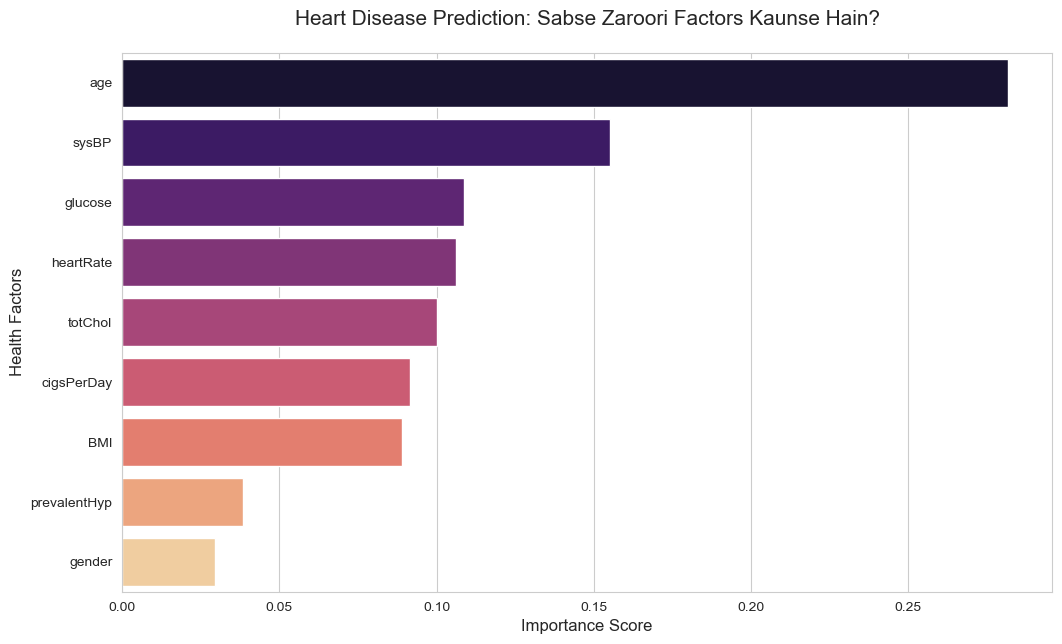

In [217]:
importances = model.feature_importances_

feature_names = [
    'gender', 'age',  'cigsPerDay', 'prevalentHyp', 
    'totChol', 'sysBP', 'BMI', 'heartRate', 'glucose'
]

feature_importance_df = pd.DataFrame({
    'Feature': feature_names,
    'Importance': importances
}).sort_values(by='Importance', ascending=False)

plt.figure(figsize=(12, 7))
sns.set_style("whitegrid")
ax = sns.barplot(
    x='Importance', 
    y='Feature', 
    data=feature_importance_df, 
    palette='magma'
)

plt.title('Heart Disease Prediction: Sabse Zaroori Factors Kaunse Hain?', fontsize=15, pad=20)
plt.xlabel('Importance Score', fontsize=12)
plt.ylabel('Health Factors', fontsize=12)
plt.show()